## House Prices: Advanced Regression Techniques - Kaggle
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

해당 경진대회는 아래 논문의 데이터셋으로 만들어졌습니다.
http://jse.amstat.org/v19n3/decock.pdf

또한, 사이킷런 공식문서에 있는 보스턴 주택가격 데이터셋도 같은 데이터셋을 기반으로 만들어져 있습니다.

## 라이브러리 로드

In [6]:
# pandas, seaborn, numpy 를 불러옵니다.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# seaborn style 설정

# Win => Malgun Gothic
sns.set(font="AppleGothic", rc={"axes.unicode_minus":False})

In [13]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
sns.barplot(x=[1, 3, -4, 5, 6])
plt.title("한글제목")

## 데이터셋 가져오기

In [15]:
# train 데이터를 불러옵니다.

train = pd.read_csv("data/house/train.csv")
train.shape

(1460, 81)

In [17]:
# 컬럼이 모두 보이도록 설정합니다.

pd.options.display.max_columns=100

In [23]:
# 미리보기를 합니다.

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# test 데이터셋을 불러오고 갯수를 출력해 봅니다.

test = pd.read_csv("data/house/test.csv")
test.shape

(1459, 80)

In [22]:
# test 데이터셋을 미리보기 합니다.

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
# set을 활용해서 컬럼을 비교합니다.

set(train.columns.tolist()) - set(test.columns.tolist())

{'SalePrice'}

## EDA

### histogram

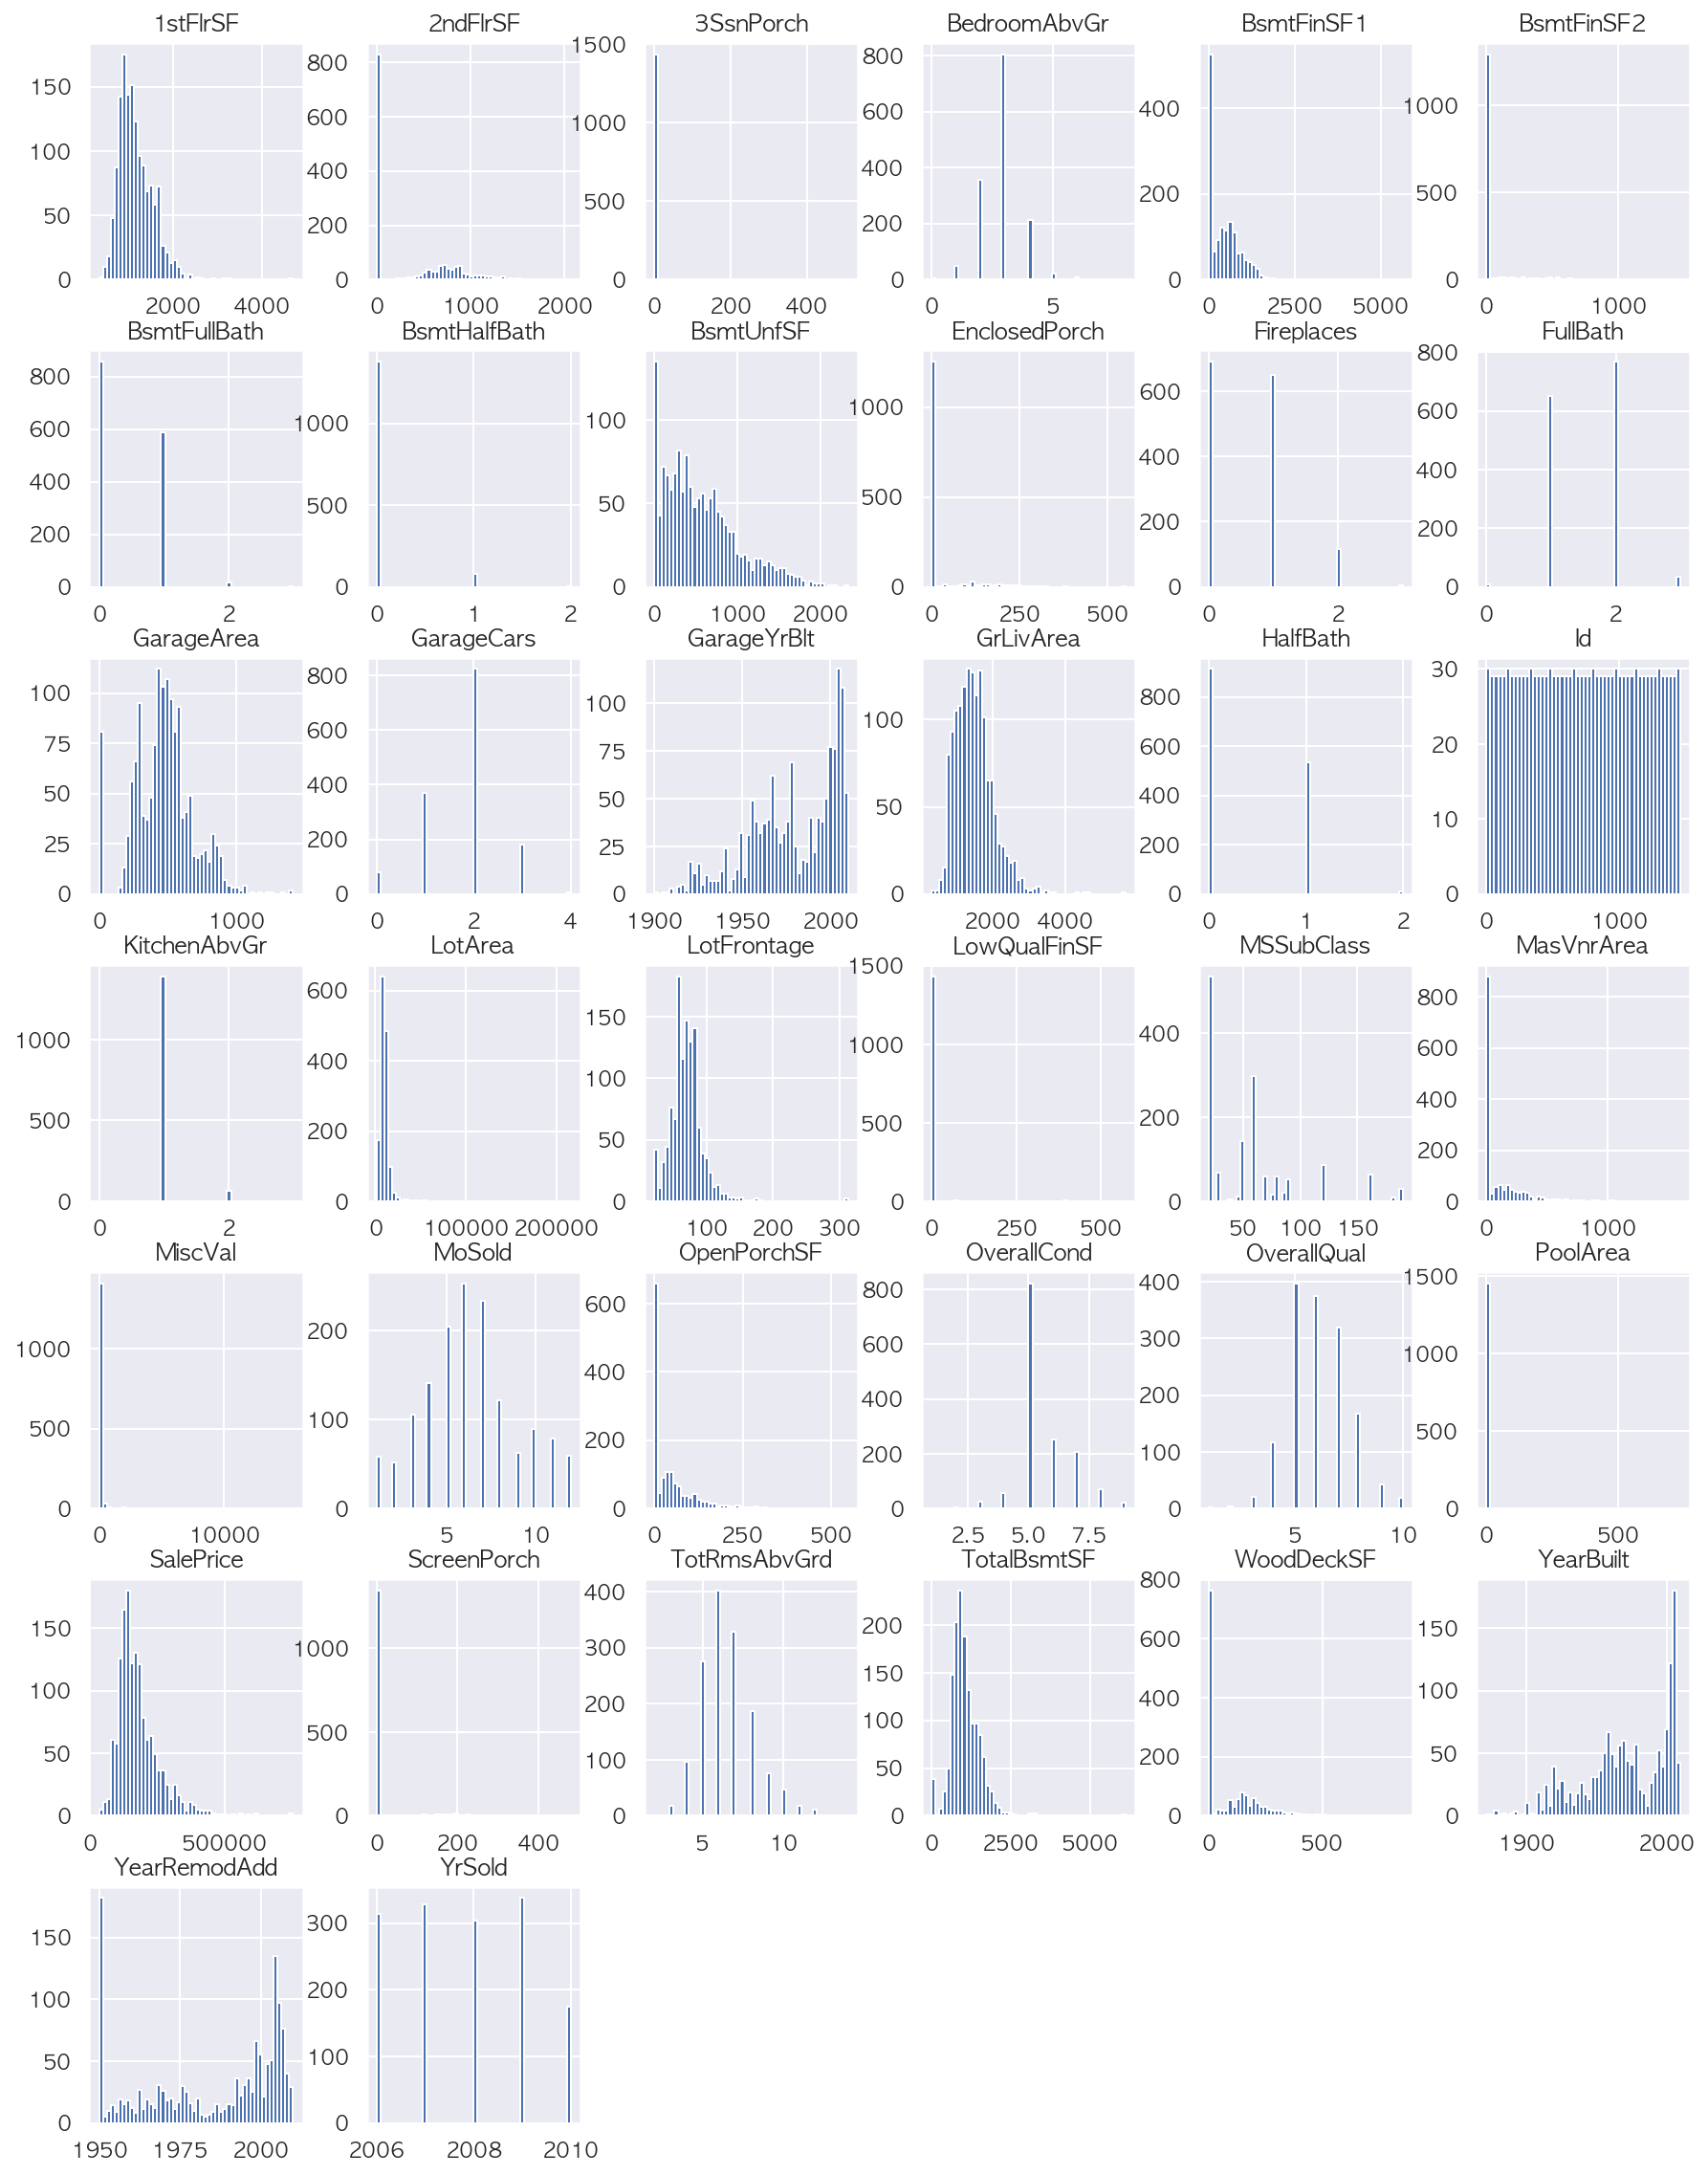

In [29]:
# 전체 변수에 대한 histogram을 그립니다. bins 옵션으로 막대의 수를 조정합니다.

h = train.hist(figsize=(15, 20), bins=50)

### 정답값 label 따로보기

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


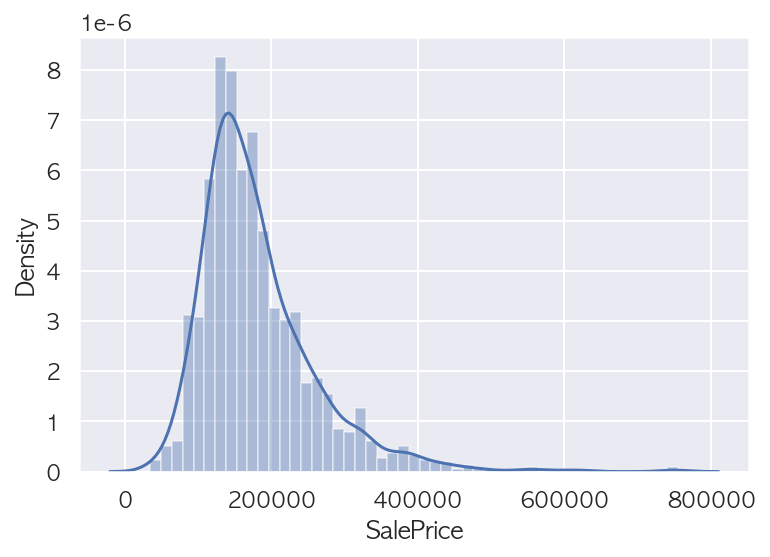

In [30]:
# SalePrice 의 distplot을 봅니다.

sns.distplot(train["SalePrice"])

In [32]:
# SalePrice 의 왜도와 첨도를 구합니다.
print("왜도(Skewness):", train["SalePrice"].skew())
print("첨도(Kurtosis):",  train["SalePrice"].kurtosis())

왜도(Skewness): 1.8828757597682129
첨도(Kurtosis): 6.536281860064529


In [44]:
train["SalePrice_log"] = np.log(train["SalePrice"] + 1)

In [45]:
# SalePrice를 정규분포로 변환하고 왜도와 첨도를 구합니다.

print("왜도(Skewness):", train["SalePrice_log"].skew())
print("첨도(Kurtosis):", train["SalePrice_log"].kurtosis())

왜도(Skewness): 0.12134661989685329
첨도(Kurtosis): 0.809519155707878


/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


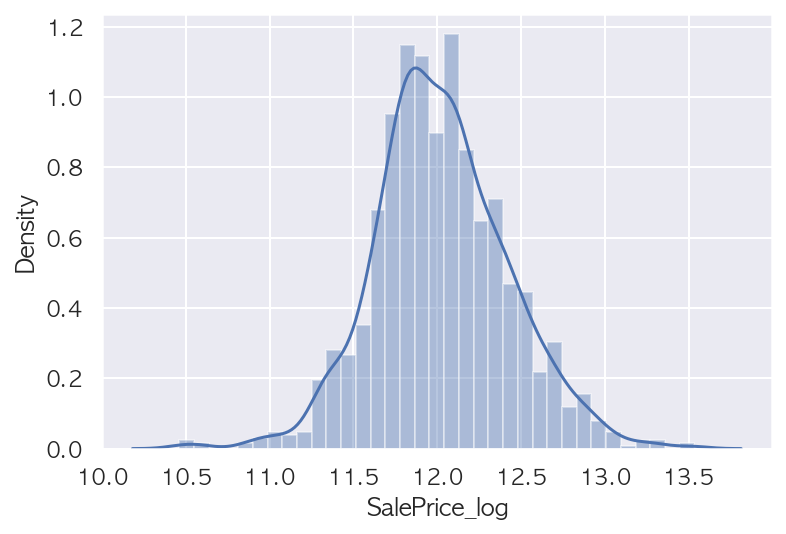

In [46]:
# SalePrice 를 정규분포 형태로 그립니다.
sns.distplot(train["SalePrice_log"])

In [48]:
train["SalePrice_exp"] = np.exp(train["SalePrice_log"]) - 1

train[["SalePrice", "SalePrice_log", "SalePrice_exp"]].head()

,SalePrice,SalePrice_log,SalePrice_exp
0,208500,12.247699,208500.0
1,181500,12.109016,181500.0
2,223500,12.317171,223500.0
3,140000,11.849405,140000.0
4,250000,12.429220,250000.0


### 결측치 보기
* [Missing data - Wikipedia](https://en.wikipedia.org/wiki/Missing_data)

In [52]:
# 결측치가 얼마나 되는지 봅니다.

train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

### 집값과 상관계수가 높은 데이터 보기

In [ ]:
# 상관계수를 구하기 전에 수치형 데이터만 불러옵니다.

train.dtypes[train.dtypes != "object"]

In [58]:
# 상관계수의 값 차이를 style.background_gradient() 로 색상으로 구분해서 봅니다.

corr = train.corr()
corr.style.background_gradient() 

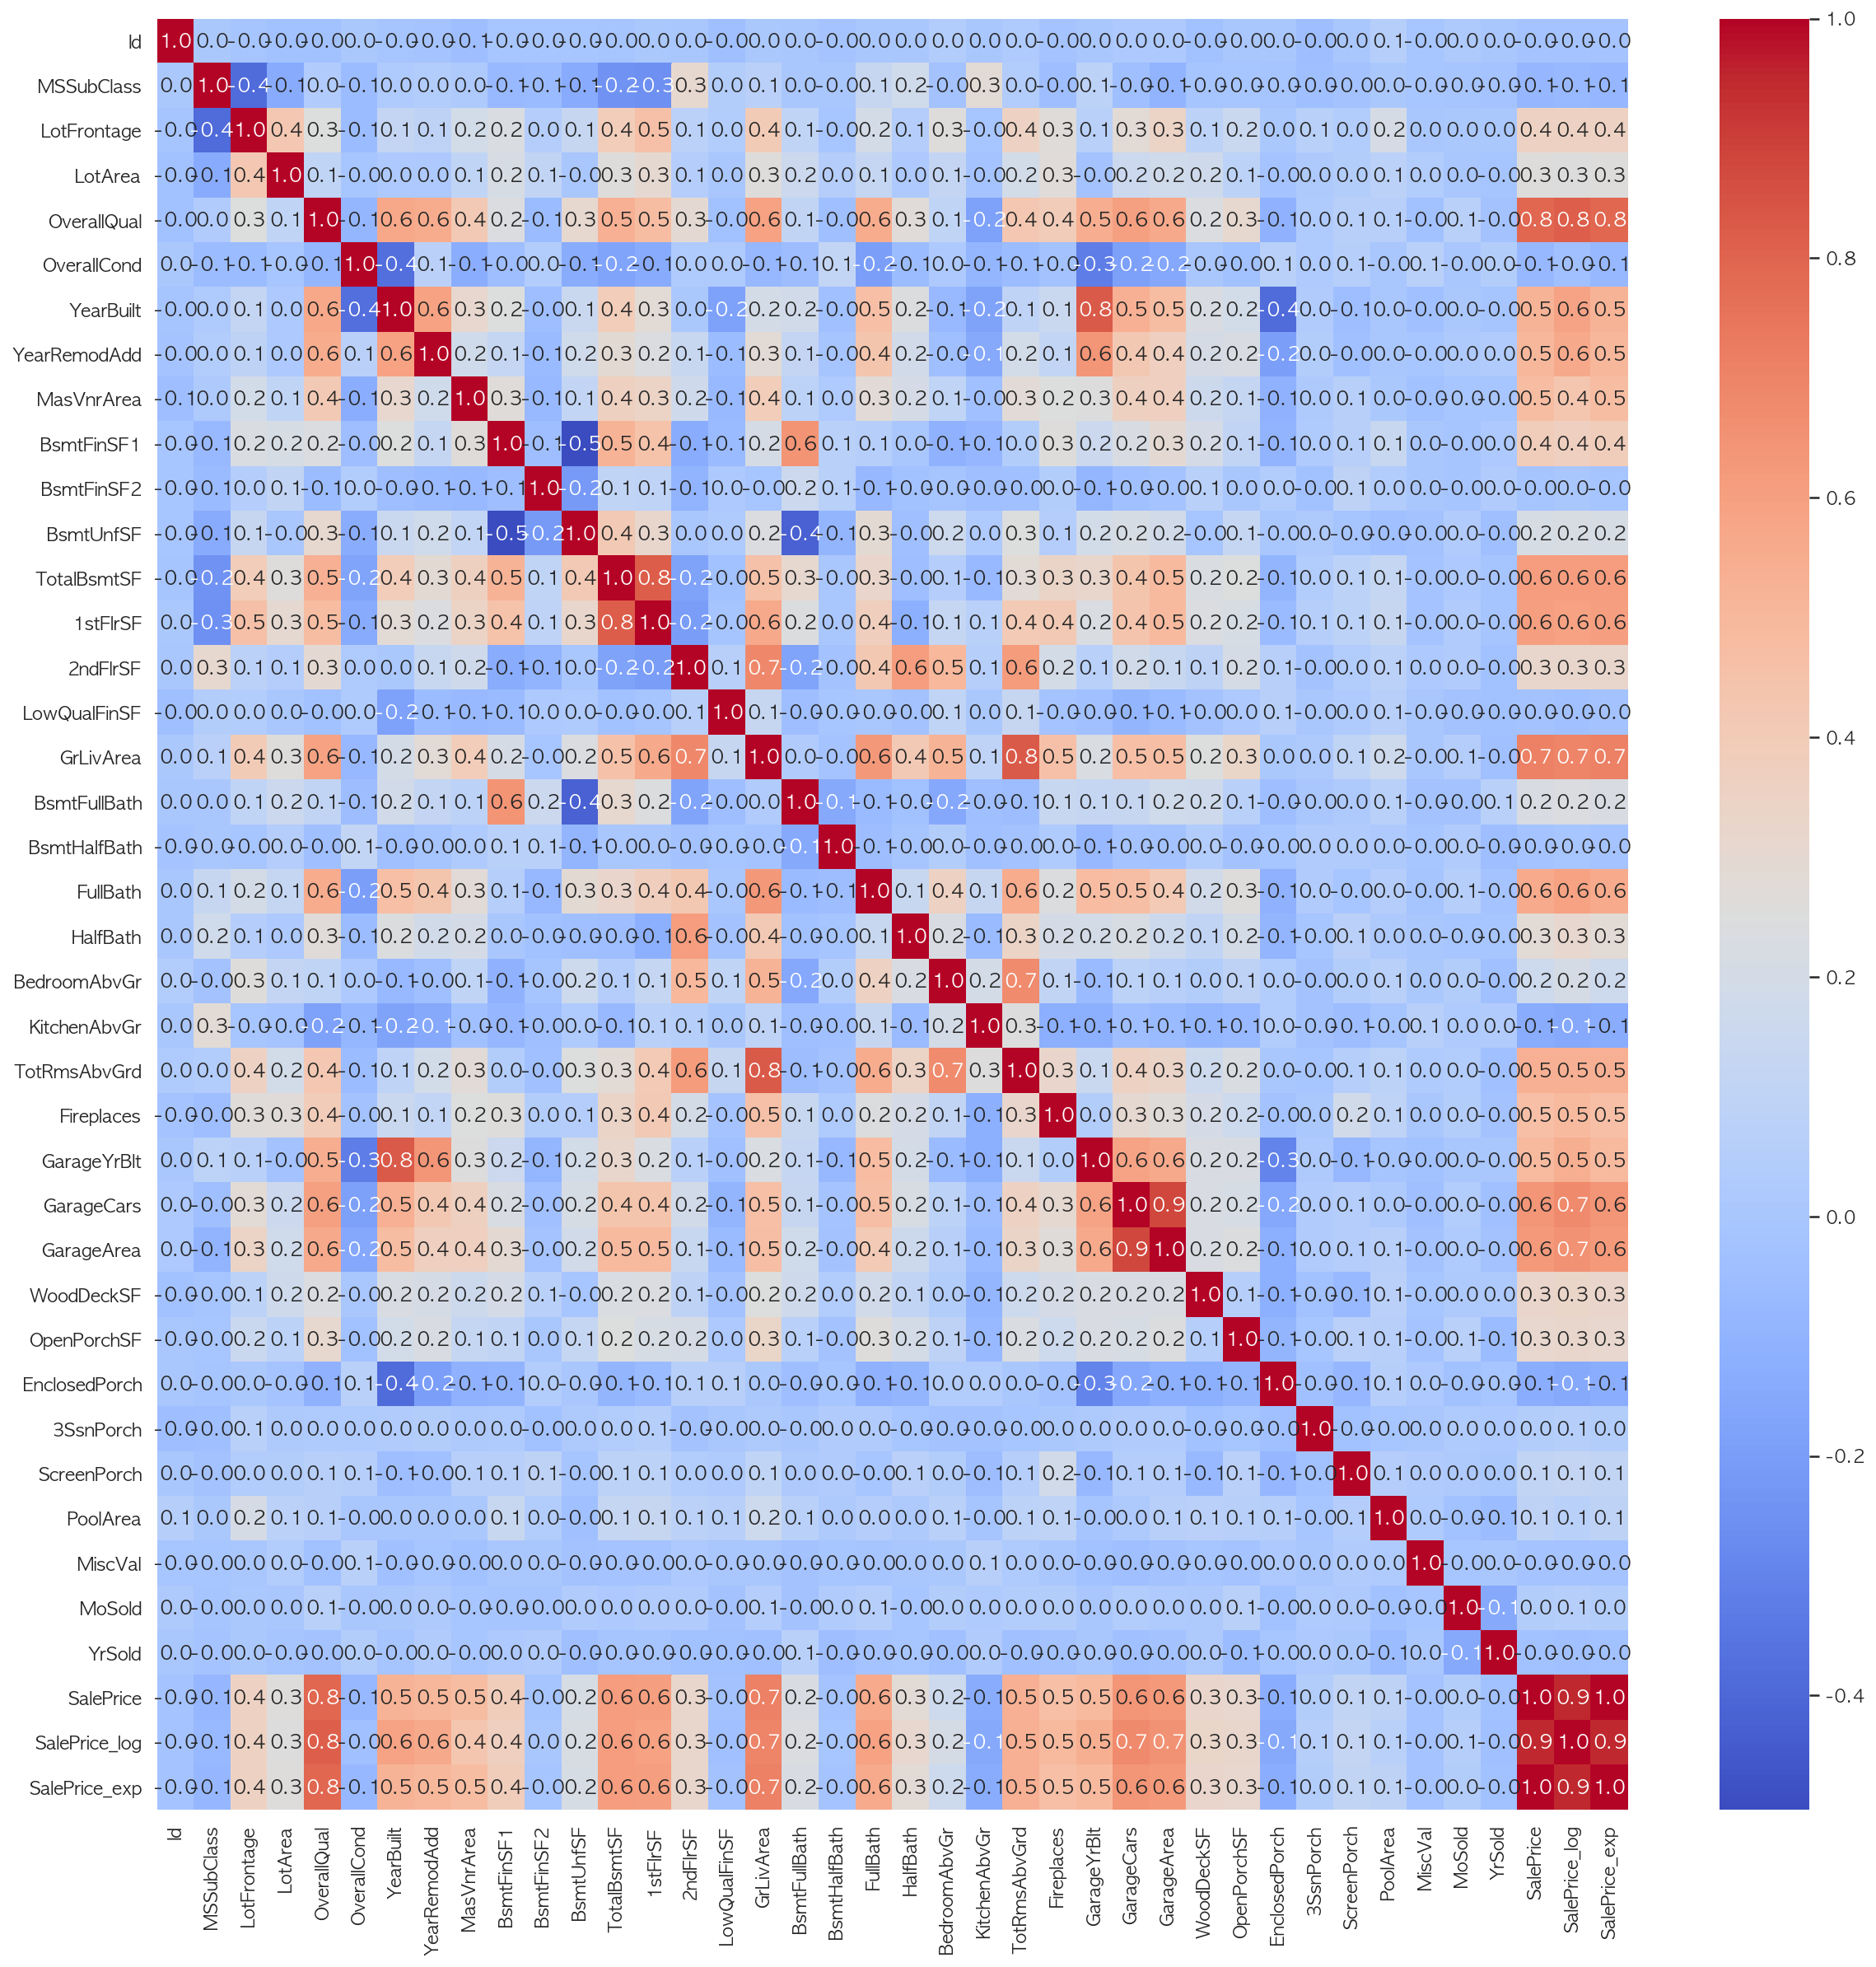

In [63]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=corr, annot=True, fmt=".1f", cmap="coolwarm")

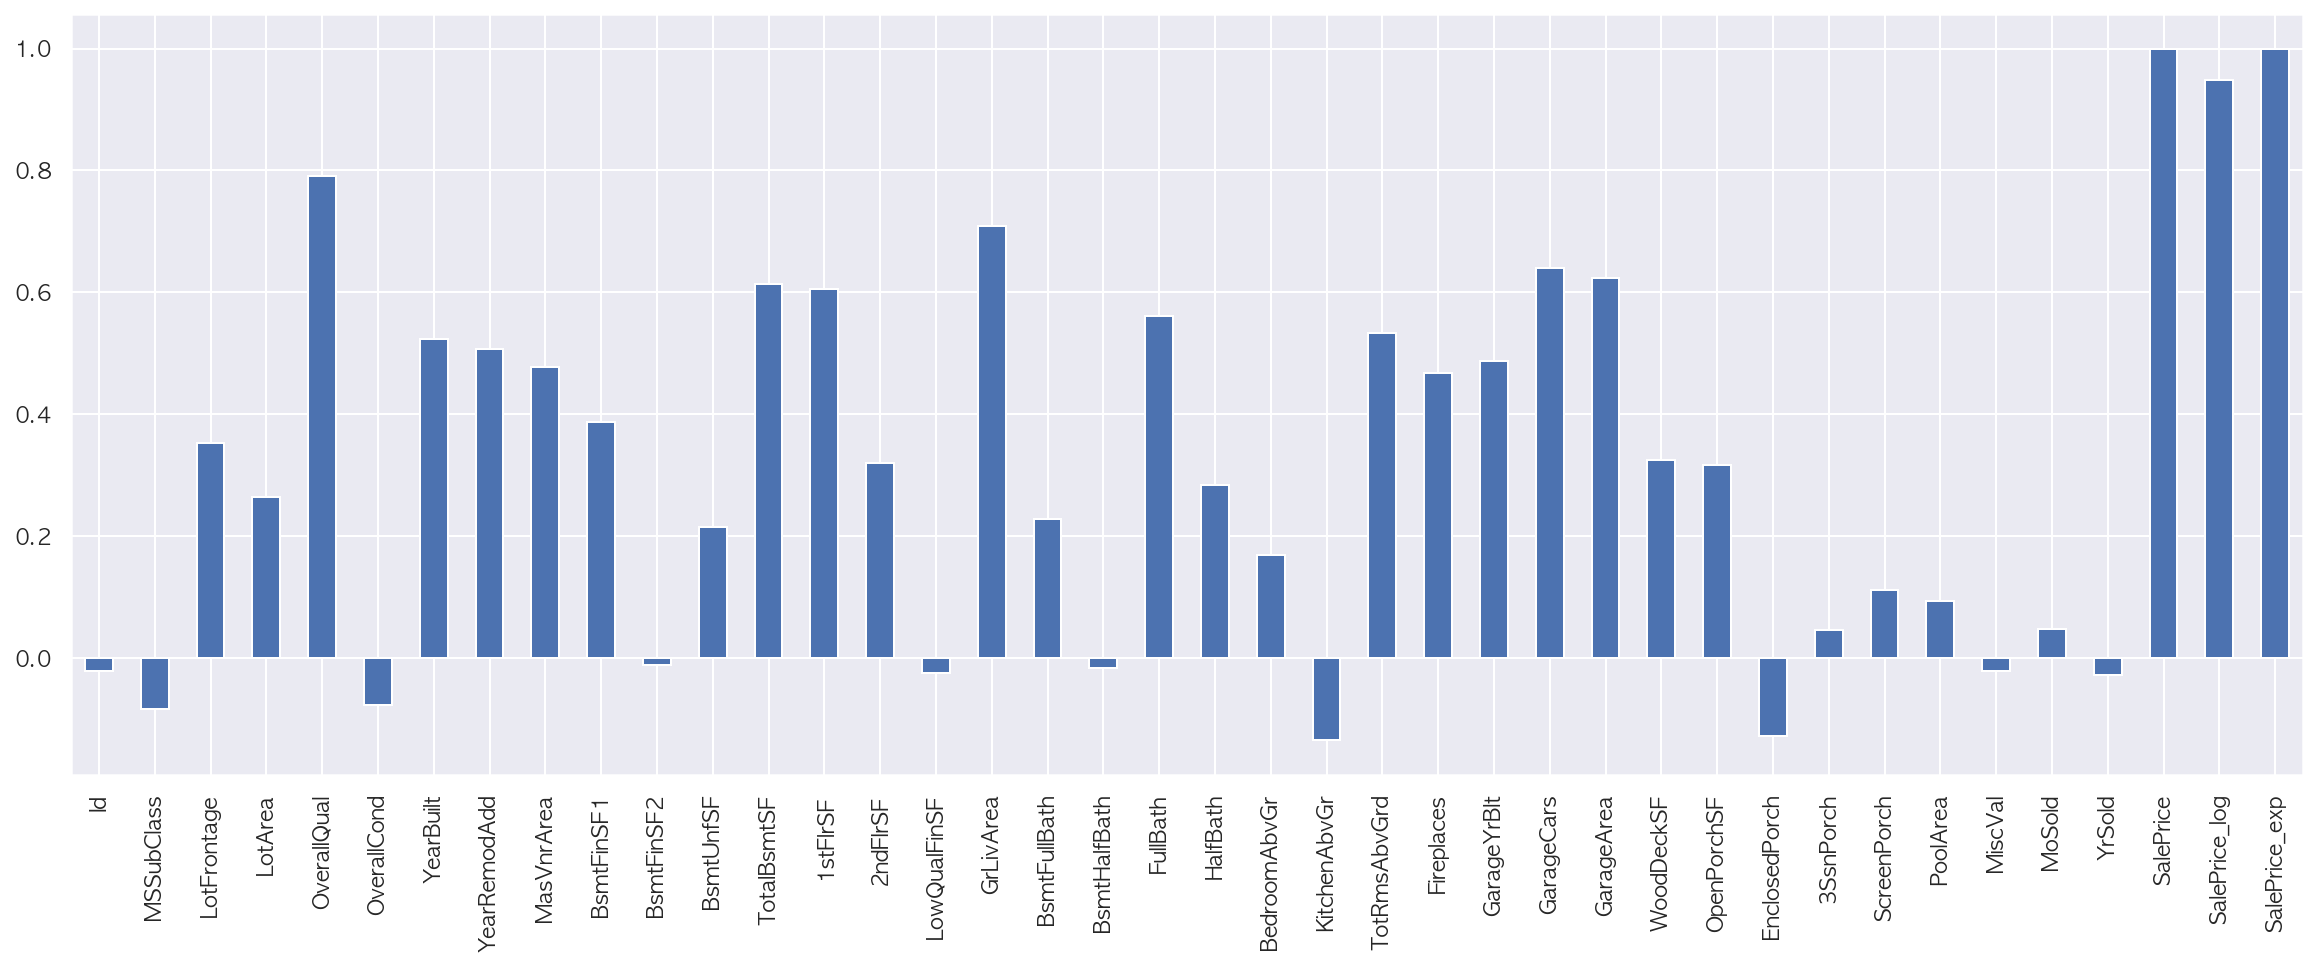

In [68]:
# SalePrice와 상관계수가 특정 수치 이상인 데이터만 봅니다.

corr["SalePrice"].plot.bar(figsize=(20, 7))

In [ ]:
corr_3 = corr[corr > 0.3]
corr_3["MSSubClass"].sort_values()

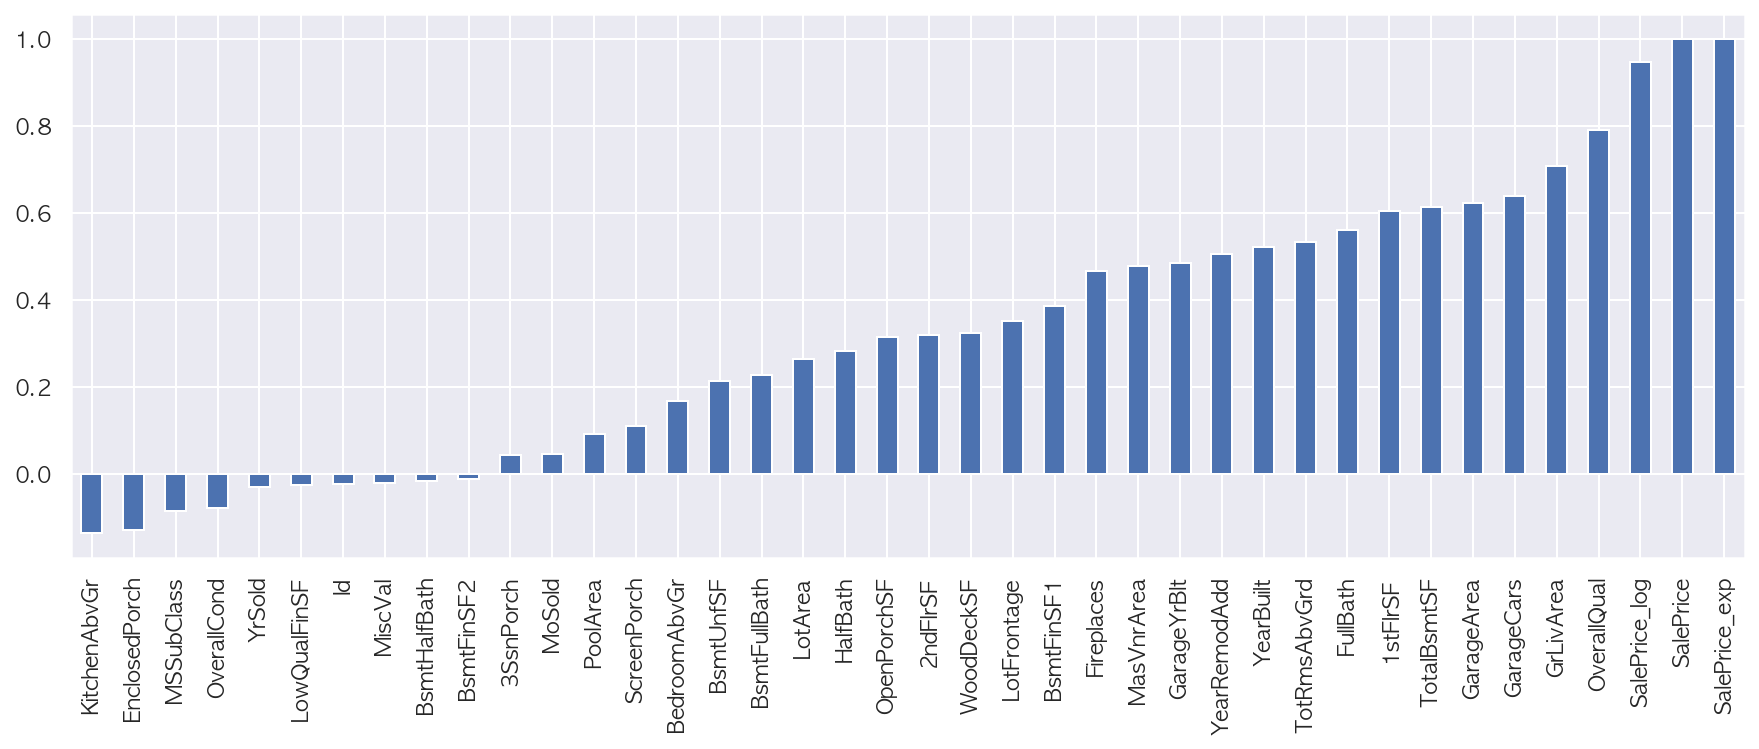

In [79]:
# SalePrice와 상관계수가 특정 수치 이상인 변수의 인덱스를 봅니다.

corr["SalePrice"].sort_values().plot.bar(figsize=(15, 5))

In [ ]:
# pairplot을 모든 변수에 대해 그리면 오래 걸립니다.
# 위에서 그렸던 상관계수가 높은 변수만 그려봅니다.
# 이상치, 상관계수, 왜도, 첨도 등을 한눈에 볼 수 있습니다.

sns.pairplot(train, )

In [81]:
corr["SalePrice"].sort_values().tail()

GrLivArea        0.708624
OverallQual      0.790982
SalePrice_log    0.948374
SalePrice        1.000000
SalePrice_exp    1.000000
Name: SalePrice, dtype: float64

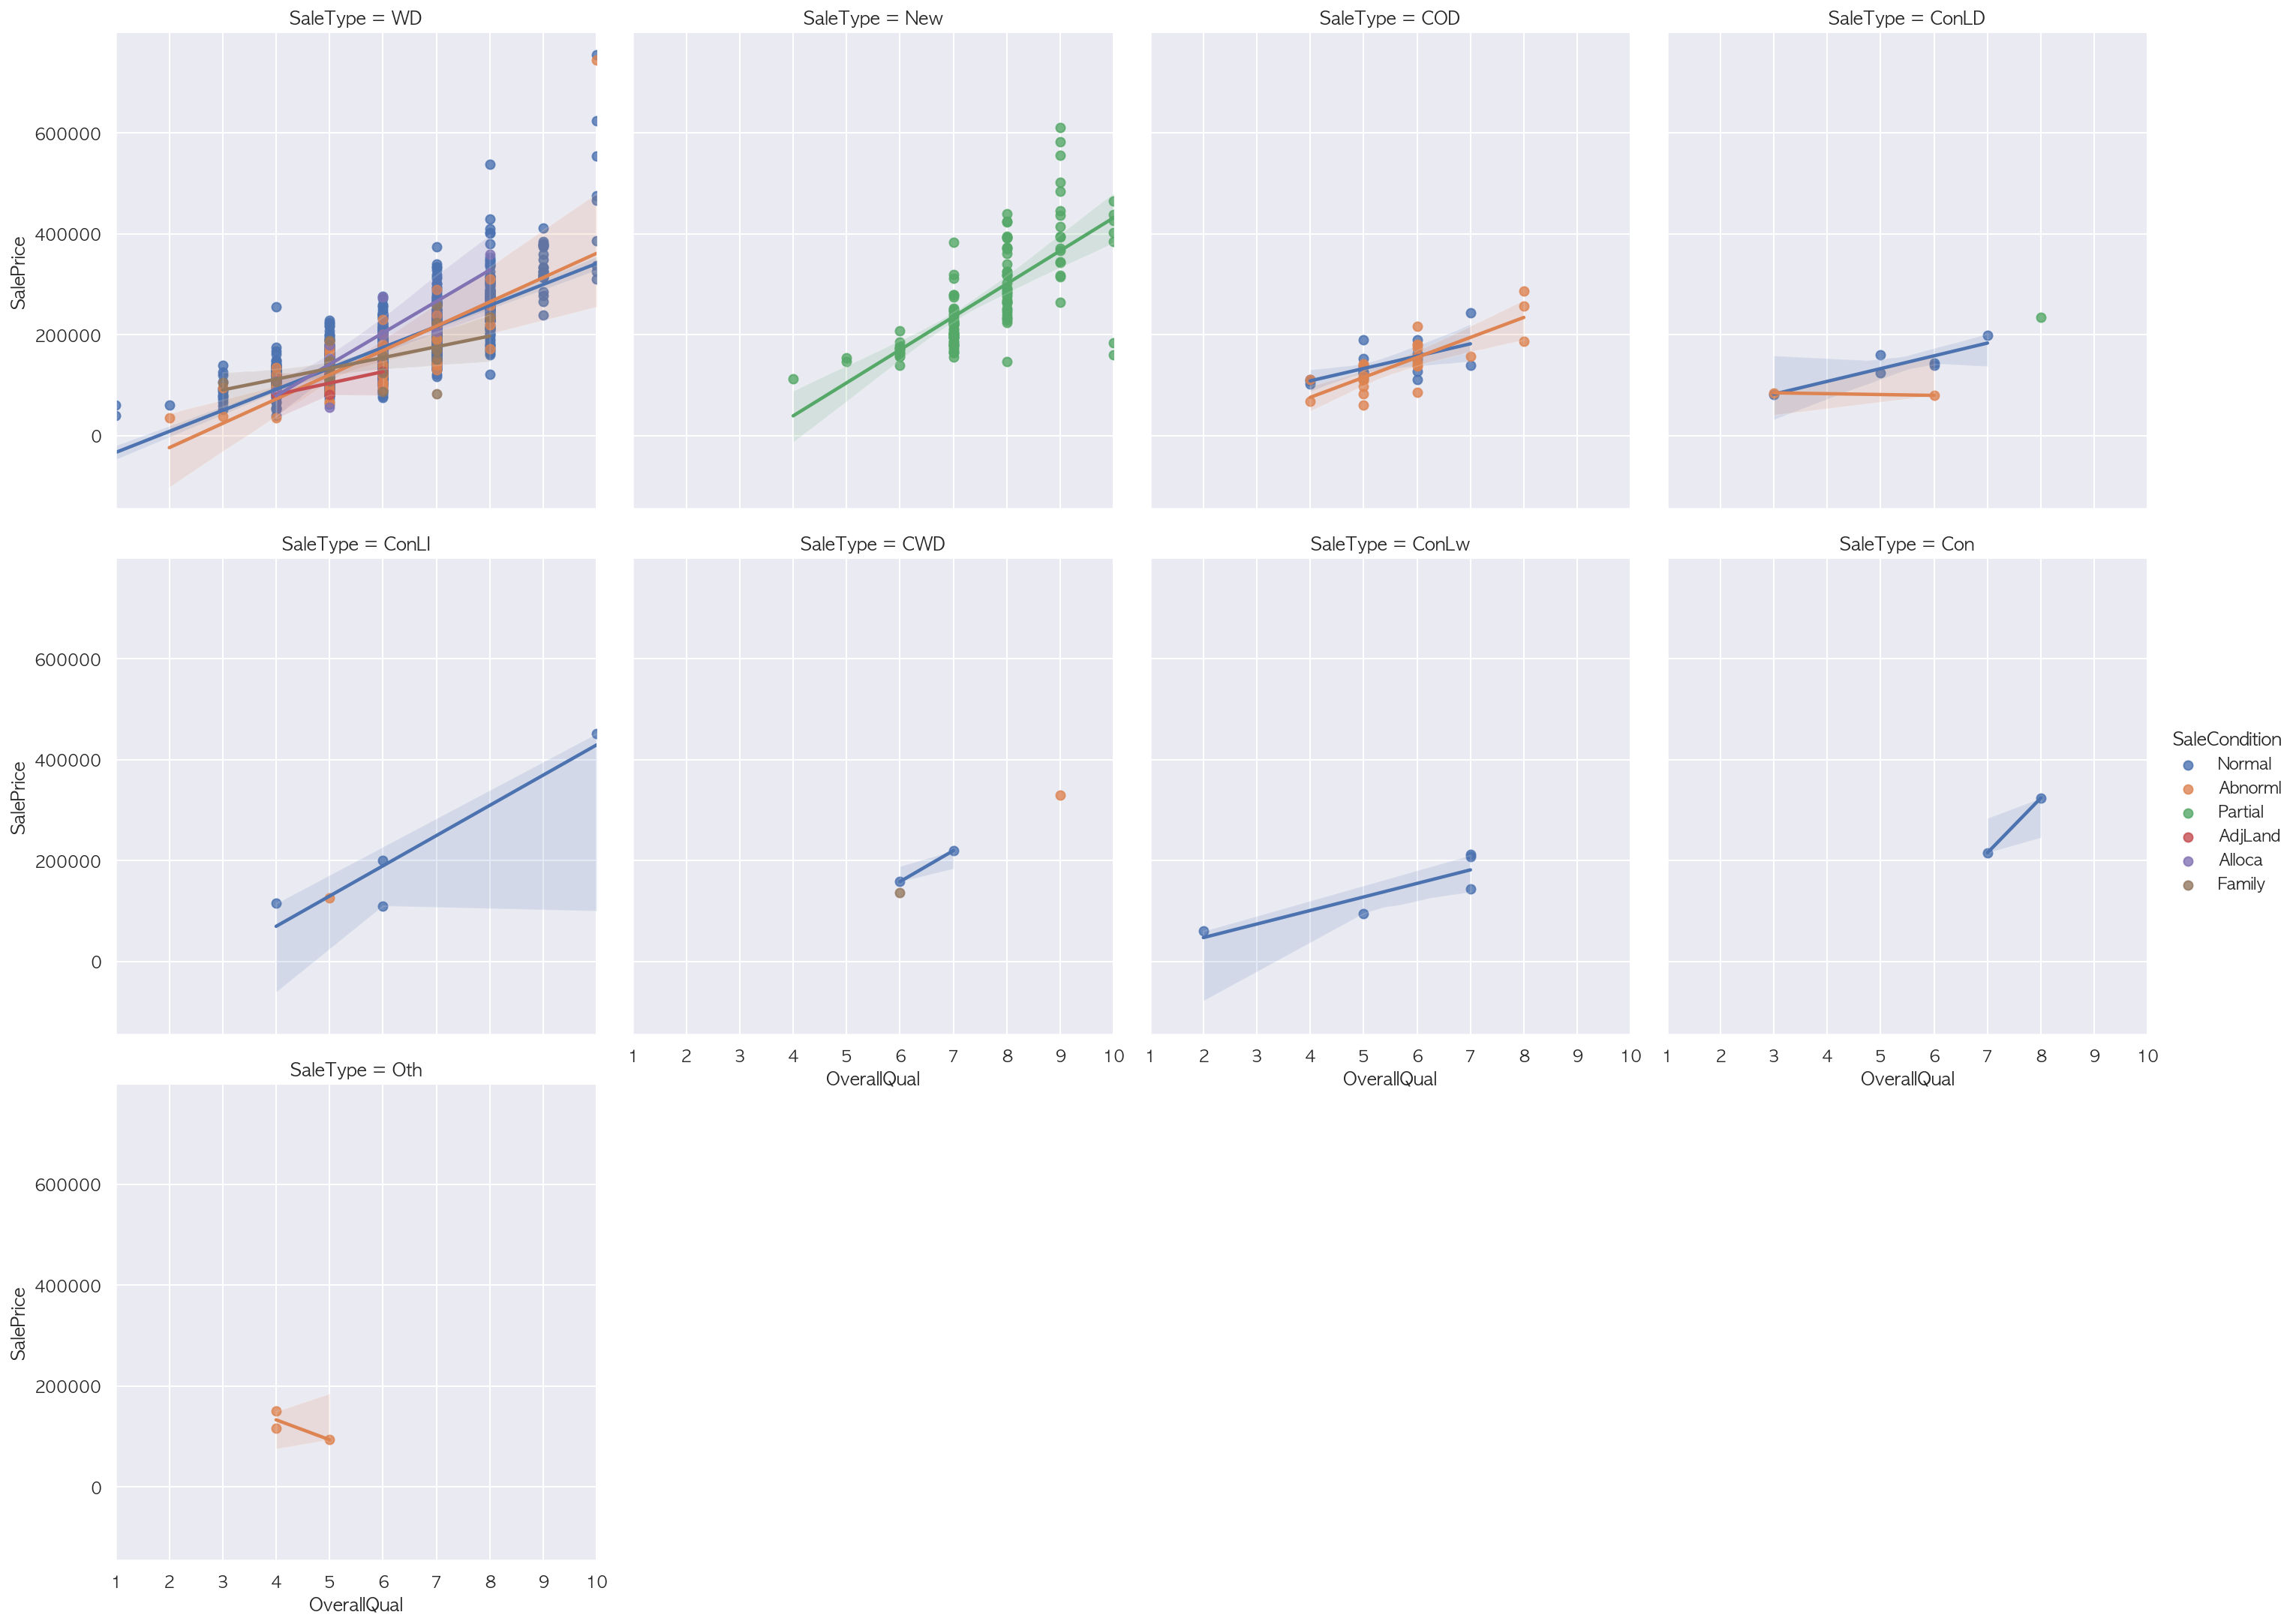

In [82]:
# lmplot으로 상관계수가 SalePrice와 가장 높은 변수의 회귀선을 그립니다.
# 이때 범주형 변수인 SaleCondition, SaleType 에 따라 색상과 컬럼을 따로 그립니다.

sns.lmplot(data=train, x="OverallQual", y="SalePrice", 
           hue="SaleCondition", col="SaleType", col_wrap=4)

### 왜도 Skewness

* [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)
* 확률 이론 및 통계학에서, 비대칭도(非對稱度, skewness) 또는 왜도(歪度)실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

In [91]:
# 왜도가 특정 수치 이상인 데이터를 따로 봅니다.
# 마이너스 값이 나올 수 있기 때문에 절대값을 씌우고 봅니다.
# 왜도가 큰 값을 skewed_col 변수에 담습니다.

train_skew = abs(train.skew())
skewed_col = train_skew[train_skew > 5].index.tolist()
skewed_col

['LotArea', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

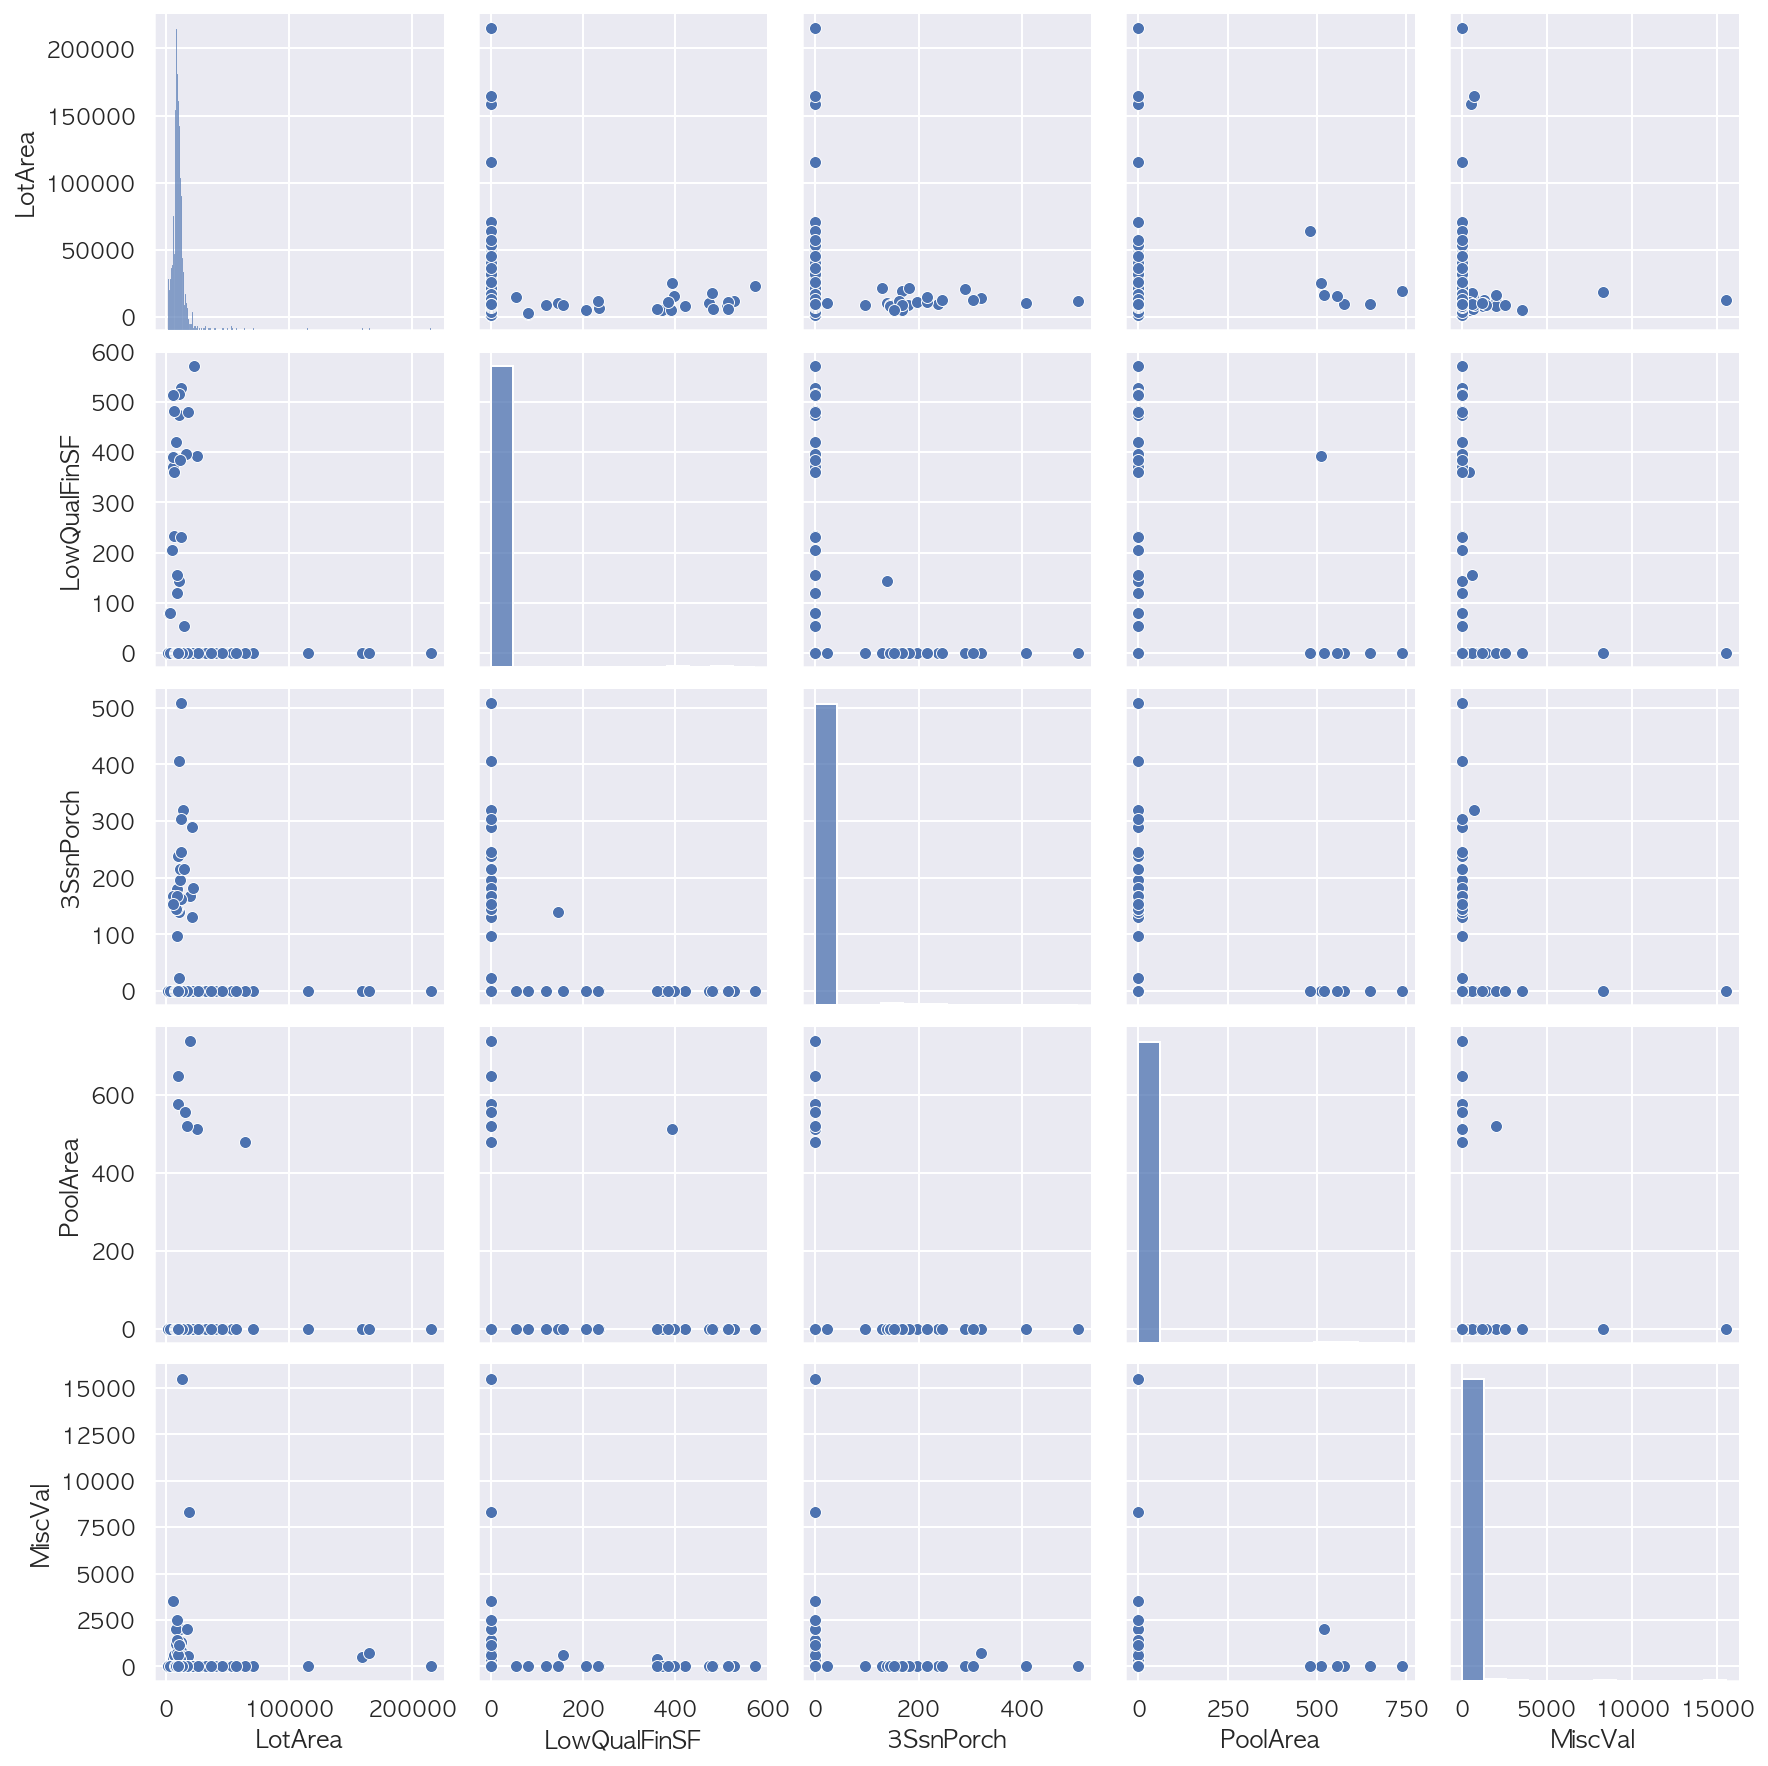

In [93]:
# 왜도가 큰 값만 따로 pairplot으로 그립니다.

sns.pairplot(train[skewed_col])

In [96]:
# 왜도를 줄여주기
# 로그변환을 통해 값의 차이가 많이 나는 것을 줄여줍니다.
# np.log(train[skewed_col] + 1)
log_col_list = []
for col in skewed_col:
    log_col = f"{col}_log"
    train[log_col] = np.log(train[col] + 1)
    log_col_list.append(log_col)

In [ ]:
sns.pairplot(train[log_col_list])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe564e8f650>,
      dtype=object)

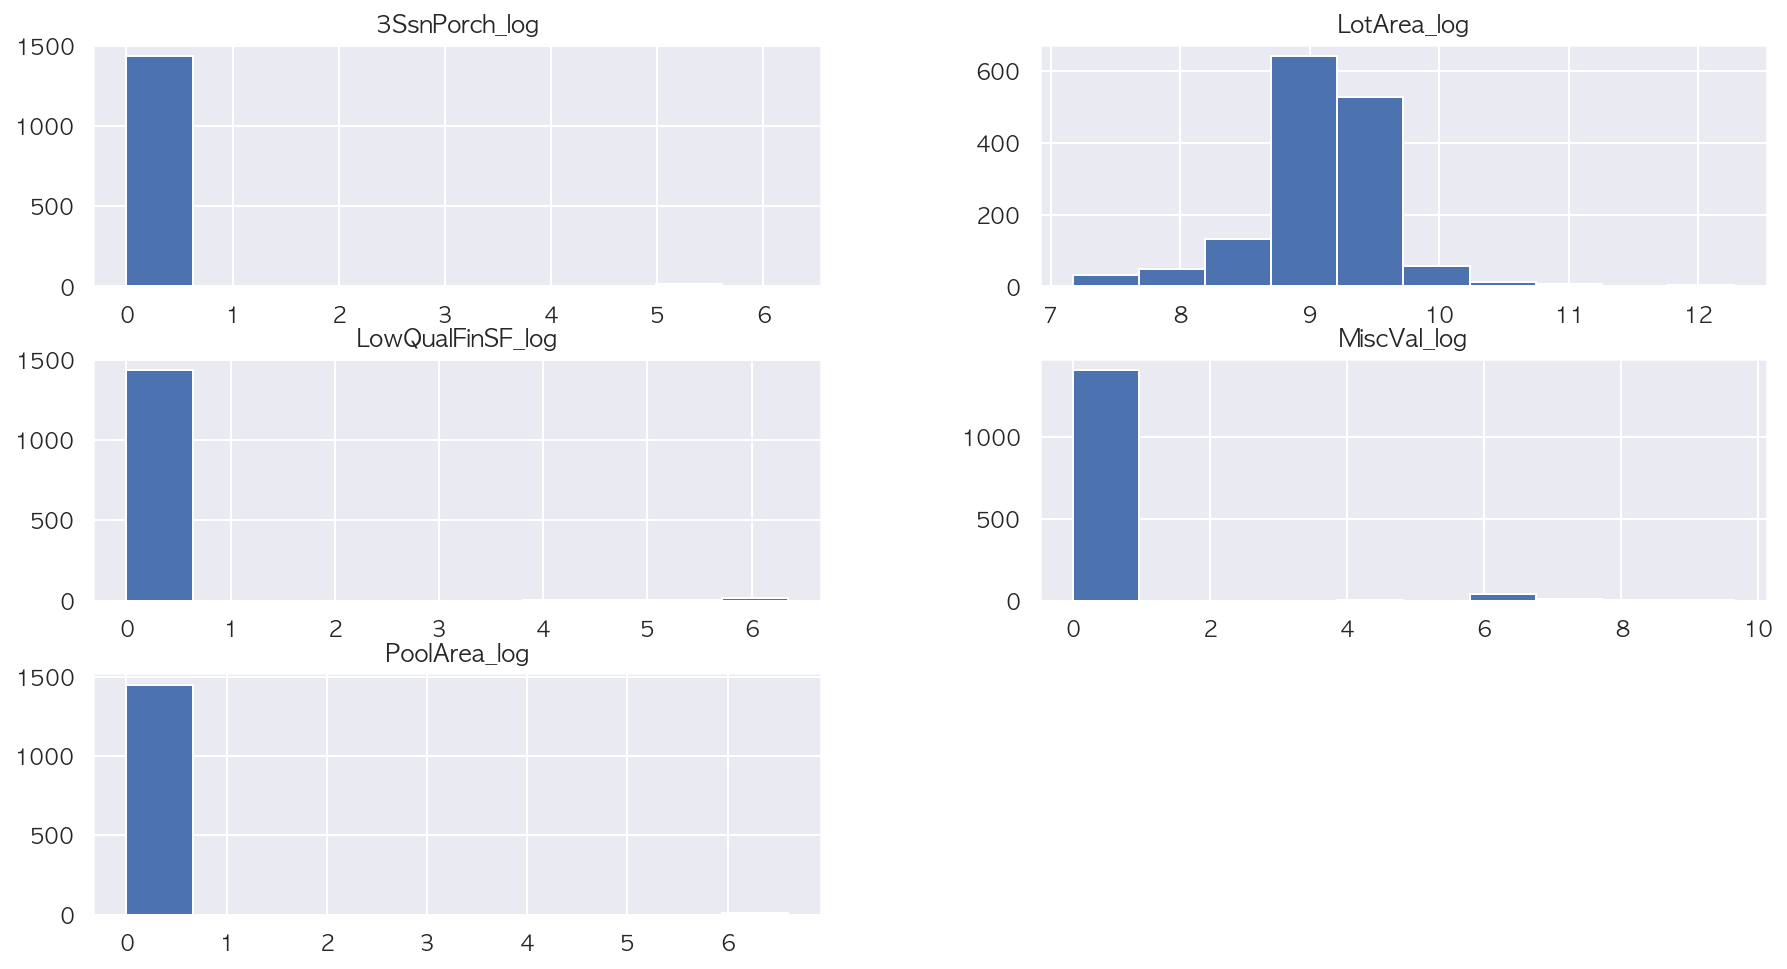

In [100]:
train[log_col_list].hist(figsize=(15, 8))

### 범주형 변수 보기

In [ ]:
# object 타입의 변수만 따로 봅니다. 

object_col = train.dtypes[train.dtypes =="object"].index.tolist()
object_col

In [105]:
# 범주형 변수의 결측치만 따로 봅니다.

train[object_col].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
# 범주형 값의 결측치를 "None" 으로 채웁니다.
train[object_col] = train[object_col].fillna("None")
train[object_col].isnull().sum()

In [114]:
# get_dummies 로 원핫인코딩을 합니다.
# train_ohe, test_ohe 이라는 새로운 변수에 담습니다.

feature_col = test.columns.tolist()
train_ohe = pd.get_dummies(train[feature_col])
test_ohe = pd.get_dummies(test[feature_col])

In [115]:
# 원핫인코딩 후 기존 데이터와 갯수를 비교합니다.

train_ohe.shape, test_ohe.shape

((1460, 304), (1459, 271))

In [ ]:
test_ohe.columns

## Feature Engineering
### 수치형 타입만 가져오기
* 모든 컬럼을 feature 로 사용하기 전에 바로 사용할 수 있는 수치 데이터를 먼저 사용합니다.

In [ ]:
# feature_names list 만들기


In [117]:
feature_names = test_ohe.columns.tolist()
len(feature_names)

271

In [ ]:
train_ohe[feature_names]

In [119]:
# label_name 변수에 예측에 사용할 정답 값 지정하기

label_name = "SalePrice"

### Feature 만들기
* 학습과 예측에 사용할 데이터셋 만들기

In [124]:
# X_train 만들기 - 학습에 사용할 데이터셋 예) 기출문제

X_train = train_ohe[feature_names]
X_train.shape

(1460, 271)

In [125]:
# y_train 만들기 - 학습에 사용할 정답값 예) 기출문제의 정답

y_train = train[label_name]
y_train.shape

(1460,)

In [128]:
# X_test - 예측에 사용할 데이터셋 예) 실전 시험문제

X_test = test_ohe[feature_names]
X_test.shape

(1459, 271)

### 수치형 변수 결측치 채우기
* 임의의 값으로 채우기
* 평균, 중앙값으로 채우기
* 제거하기
* 머신러닝 기법으로 채우기
* [Imputing missing values before building an estimator — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)

In [130]:
# X_train의 결측치를 fillna 로 채우기

X_train = X_train.fillna(0)

In [131]:
# X_test의 결측치를 fillna 로 채우기

X_test = X_test.fillna(0)

### log 변환하기

In [170]:
y_train = np.log(train[label_name] + 1)

In [171]:
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## 머신러닝으로 예측하기

In [191]:
# 머신러닝 모델을 불러옵니다.

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(random_state=42)
# model

In [230]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=10, random_state=42)
# model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [236]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [260]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


estimators = [DecisionTreeRegressor(), 
              RandomForestRegressor(), 
              GradientBoostingRegressor()]

In [266]:
for estimator in estimators:
    print(estimator.__class__.__name__)

DecisionTreeRegressor
RandomForestRegressor
GradientBoostingRegressor


In [265]:
np.random.uniform(0.3, 1.0, 10)

array([0.86789297, 0.45267461, 0.95008599, 0.93405777, 0.6248054 ,
       0.44222284, 0.48669463, 0.96704338, 0.80363804, 0.58180849])

In [269]:
from sklearn.model_selection import RandomizedSearchCV


rs_result_list = [] # 모든 결과 목록
for estimator in estimators:
    
    rs_result =  [] # 해당 for문의 결과
    param_distributions = {
        "max_depth": np.random.randint(5, 30, 10), 
        "max_features" : np.random.uniform(0.3, 1.0, 10)
    }
    
    regessor = RandomizedSearchCV(
        estimator,
        param_distributions,
        n_iter=100,
        scoring=None,
        n_jobs=-1,
        refit=True,
        cv=10,
        verbose=0,
        random_state=42)
    regessor.fit(X_train, y_train)
    
    rs_result.append(estimator.__class__.__name__)
    rs_result.append(regessor.best_estimator_)
    rs_result.append(regessor.best_params_)
    rs_result.append(regessor.best_score_)
    rs_result.append(regessor.cv_results_)
    rs_result_list.append(rs_result)

In [280]:
df_result = pd.DataFrame(rs_result_list, 
                         columns = ["estimator", "best_estimator_", 
                                    "best_params_", "best_score_", "cv_results_"])
df_best = df_result.sort_values("best_score_", ascending=False).head(1)
df_best

,estimator,best_estimator_,best_params_,best_score_,cv_results_
2,GradientBoostingRegressor,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...","{'max_features': 0.7704458904743343, 'max_dept...",0.886252,"{'mean_fit_time': [1.4684242725372314, 1.48104..."


In [291]:
model = df_best.iloc[0]["best_estimator_"]
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=0.7704458904743343, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### KFold 로 Cross Validation 하기

In [285]:
# KFold 를 사용해서 분할을 나눕니다.

from sklearn.model_selection import KFold

KFold(5)

KFold(n_splits=5, random_state=None, shuffle=False)

### cross_val_score 와 cross_val_predict 로 점수 구하기

In [286]:
# cross_val_score 로 점수를 계산합니다.
# scoring='neg_root_mean_squared_error'
# cv_results 에 결과값을 담고 평균을 구합니다.


from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8903216659991802

In [287]:
# cross_val_predict 로 예측 결과를 구합니다.
# y_cv_pred 에 결과를 담습니다.

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)

### RMSE

In [288]:
# 직접 RMSE로 오차를 구합니다.

error = (y_train - y_pred)
mse = (error ** 2).mean()
rmse = np.sqrt(mse)
rmse

0.1414448715303191

### 실제값과 예측값 비교하기

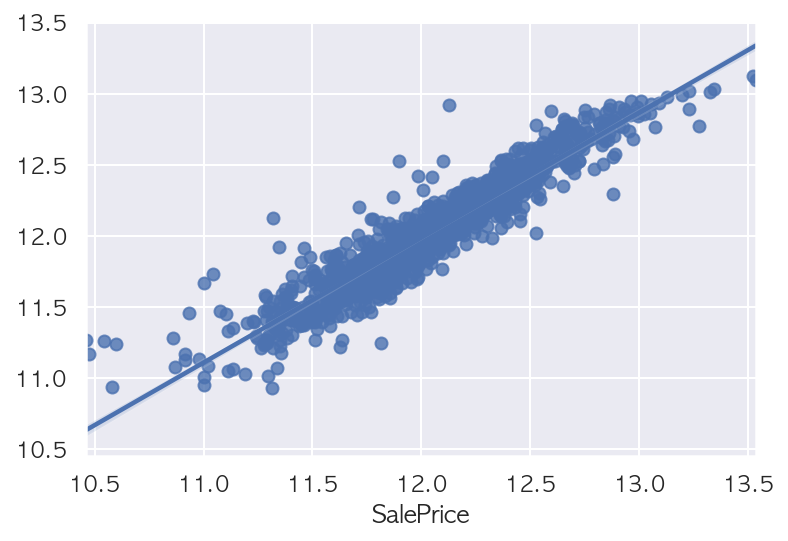

In [241]:
# regplot 으로 예측값에 대한 회귀선 그리기

sns.regplot(x=y_train, y=y_pred)

In [242]:
# r2스코어로 회귀선의 기울기 구하기

from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.8869791957999824

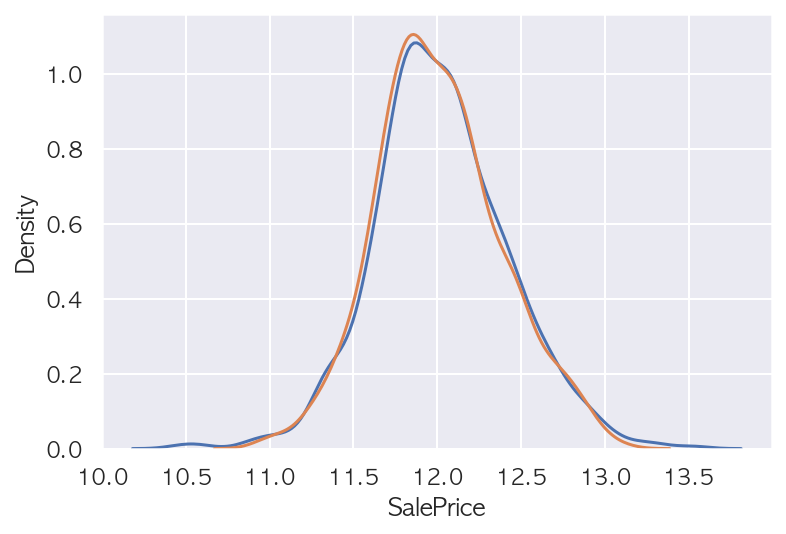

In [243]:
# distplot의 kdeplot으로 실제값과 예측값 비교하기

sns.kdeplot(y_train)
sns.kdeplot(y_pred)

## 학습(훈련)과 예측

In [292]:
# 학습하고 예측하기
# 모의고사를 풀어보고 바로 실전을 풀어봅니다.

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=0.7704458904743343, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [293]:
y_test_pred = model.predict(X_test)

### 피처 중요도 보기

In [294]:
# 피처 중요도 보기
df_importance = pd.DataFrame({"importance" : model.feature_importances_, "feature_names": feature_names})
df_importance_top = df_importance.sort_values("importance", ascending=False).head(10)

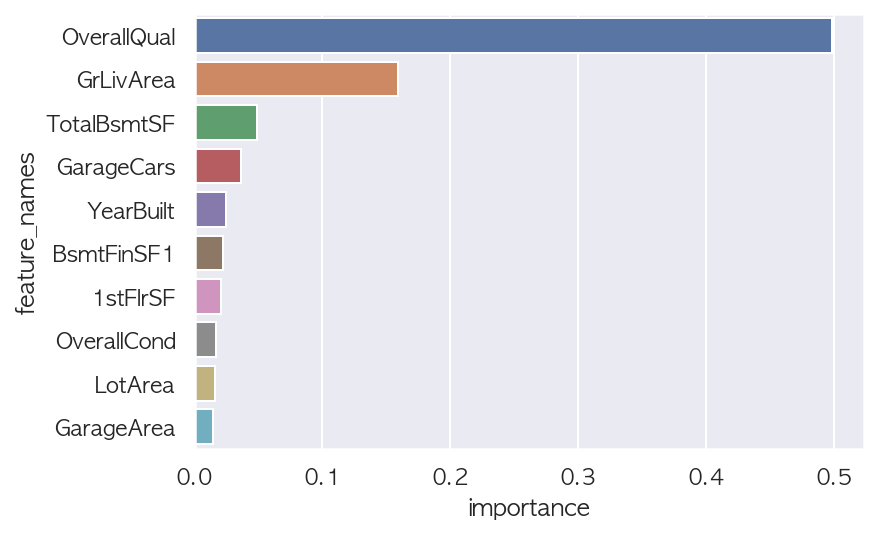

In [295]:
# 시각화 하기

sns.barplot(data=df_importance_top, x="importance", y="feature_names")

## Submit

In [296]:
# 제출 파일 양식을 불러옵니다.

submit = pd.read_csv("data/house/sample_submission.csv")
submit.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [297]:
# 정답을 옮겨 적습니다.

submit["SalePrice"] = np.exp(y_test_pred) - 1
submit.head()

,Id,SalePrice
0,1461,119554.169392
1,1462,155354.921022
2,1463,181065.493792
3,1464,188649.014708
4,1465,185876.375302


In [298]:
# csv 파일로 저장합니다.
submit.to_csv("data/house/submit.csv", index=False)

In [299]:
# 제대로 저장되었는지 확인합니다.

pd.read_csv("data/house/submit.csv")

,Id,SalePrice
0,1461,119554.169392
1,1462,155354.921022
2,1463,181065.493792
3,1464,188649.014708
4,1465,185876.375302
...,...,...
1454,2915,75221.993209
1455,2916,83383.205968
1456,2917,158913.258336
1457,2918,116098.788796


In [300]:
3878 / 4666

0.831118731247321

In [253]:
2689 / 4666

0.5762966138019717

In [255]:
1892 / 4666

0.405486498071153